In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt
import warnings
import glob 
import os 
from sklearn.metrics import mean_squared_error

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.10.0


In [22]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [23]:
def custom_scheduler(epoch, lr):
    if epoch < 4:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(512, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                    loss="mse",
                    metrics=['mae'])
      return model

scheduler = LearningRateScheduler(custom_scheduler)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)
callbacks = [scheduler, tensorboard]

EPOCHS = 50
BATCH_SIZE=64

DATASET_CALOSC=pd.read_csv('../Dane/data_nowe/dane_przetworzone/12_wybranych/calosc/calosc.csv')


In [24]:
input_3_plot=np.arange(0,100,100/1440) 
input_3=np.vstack((2*np.ones_like(input_3_plot, dtype=int),2*np.ones_like(input_3_plot, dtype=int),input_3_plot)).T

In [25]:
DATASET_CALOSC

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw,Tyg_zuzycie
0,2.0,1.0,0.000000,0.0,627.50
1,2.0,1.0,0.000694,0.0,627.50
2,2.0,1.0,0.001389,0.0,627.50
3,2.0,1.0,0.002083,0.0,627.50
4,2.0,1.0,0.002778,0.0,627.50
...,...,...,...,...,...
2096635,1.0,7.0,0.996528,0.0,1185.25
2096636,1.0,7.0,0.997222,0.0,1185.25
2096637,1.0,7.0,0.997917,0.0,1185.25
2096638,1.0,7.0,0.998611,0.0,1185.25


# model 3 input

In [26]:
dataset = DATASET_CALOSC
dataset=dataset.drop(columns="Tyg_zuzycie")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_calosc_danych_bez_dodatku =build_and_compile_model_input(3)
model_calosc_danych_bez_dodatku.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
model_calosc_danych_bez_dodatku.save("../Modele/11_12_testowanie/model_calosc_bez_dodatku")


Epoch 1/50
26208/26208 [==============================] - 54s 2ms/step - loss: 0.5653 - mae: 0.1727 - lr: 0.0010
Epoch 2/50
26208/26208 [==============================] - 52s 2ms/step - loss: 0.5629 - mae: 0.1713 - lr: 0.0010
Epoch 3/50
26208/26208 [==============================] - 50s 2ms/step - loss: 0.5628 - mae: 0.1711 - lr: 0.0010
Epoch 4/50
26208/26208 [==============================] - 52s 2ms/step - loss: 0.5627 - mae: 0.1711 - lr: 0.0010
Epoch 5/50
26208/26208 [==============================] - 52s 2ms/step - loss: 0.5625 - mae: 0.1710 - lr: 9.0484e-04
Epoch 6/50
26208/26208 [==============================] - 52s 2ms/step - loss: 0.5624 - mae: 0.1707 - lr: 8.1873e-04
Epoch 7/50
26208/26208 [==============================] - 52s 2ms/step - loss: 0.5623 - mae: 0.1705 - lr: 7.4082e-04
Epoch 8/50
26208/26208 [==============================] - 50s 2ms/step - loss: 0.5622 - mae: 0.1704 - lr: 6.7032e-04
Epoch 9/50
26208/26208 [==============================] - 50s 2ms/step - loss: 0

# model 4 input

In [27]:
dataset = DATASET_CALOSC
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Tyg_zuzycie")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_calosc_danych_z_dodatku =build_and_compile_model_input(4)
model_calosc_danych_z_dodatku.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
model_calosc_danych_z_dodatku.save("../Modele/11_12_testowanie/model_calosc_z_dodatku")

Epoch 1/50
26208/26208 [==============================] - 50s 2ms/step - loss: 0.9482 - mae: 0.2140 - lr: 0.0010
Epoch 2/50
26208/26208 [==============================] - 47s 2ms/step - loss: 0.5638 - mae: 0.1693 - lr: 0.0010
Epoch 3/50
26208/26208 [==============================] - 47s 2ms/step - loss: 0.5657 - mae: 0.1703 - lr: 0.0010
Epoch 4/50
26208/26208 [==============================] - 50s 2ms/step - loss: 0.5657 - mae: 0.1702 - lr: 0.0010
Epoch 5/50
26208/26208 [==============================] - 49s 2ms/step - loss: 0.5657 - mae: 0.1703 - lr: 9.0484e-04
Epoch 6/50
26208/26208 [==============================] - 48s 2ms/step - loss: 0.5657 - mae: 0.1703 - lr: 8.1873e-04
Epoch 7/50
26208/26208 [==============================] - 48s 2ms/step - loss: 0.5657 - mae: 0.1703 - lr: 7.4082e-04
Epoch 8/50
26208/26208 [==============================] - 47s 2ms/step - loss: 0.5657 - mae: 0.1703 - lr: 6.7032e-04
Epoch 9/50
26208/26208 [==============================] - 49s 2ms/step - loss: 0

# Porównanie

In [28]:
def prep_data(data):
    data=data.drop(columns="Tyg_zuzycie")
    data['Czas_dnia'] = data['Czas_dnia'] * 100
    x=data.drop(columns="Przeplyw")
    y=data.drop(columns="Dzien_tygodnia")
    y=y.drop(columns="Czas_dnia")
    y=y.drop(columns="Pora_roku")
    return [x,y]

Epoch 1/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.7101 - mae: 0.1708 - lr: 0.0010
Epoch 2/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.7005 - mae: 0.1636 - lr: 0.0010
Epoch 3/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.6998 - mae: 0.1635 - lr: 0.0010
Epoch 4/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.6998 - mae: 0.1643 - lr: 0.0010
Epoch 5/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.6999 - mae: 0.1634 - lr: 9.0484e-04
Epoch 6/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.6996 - mae: 0.1641 - lr: 8.1873e-04
Epoch 7/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.6994 - mae: 0.1639 - lr: 7.4082e-04
Epoch 8/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.6990 - mae: 0.1648 - lr: 6.7032e-04
Epoch 9/50
2016/2016 [==============================] - 4s 2ms/step - loss: 0.6988 - mae: 0.1635 - lr: 6

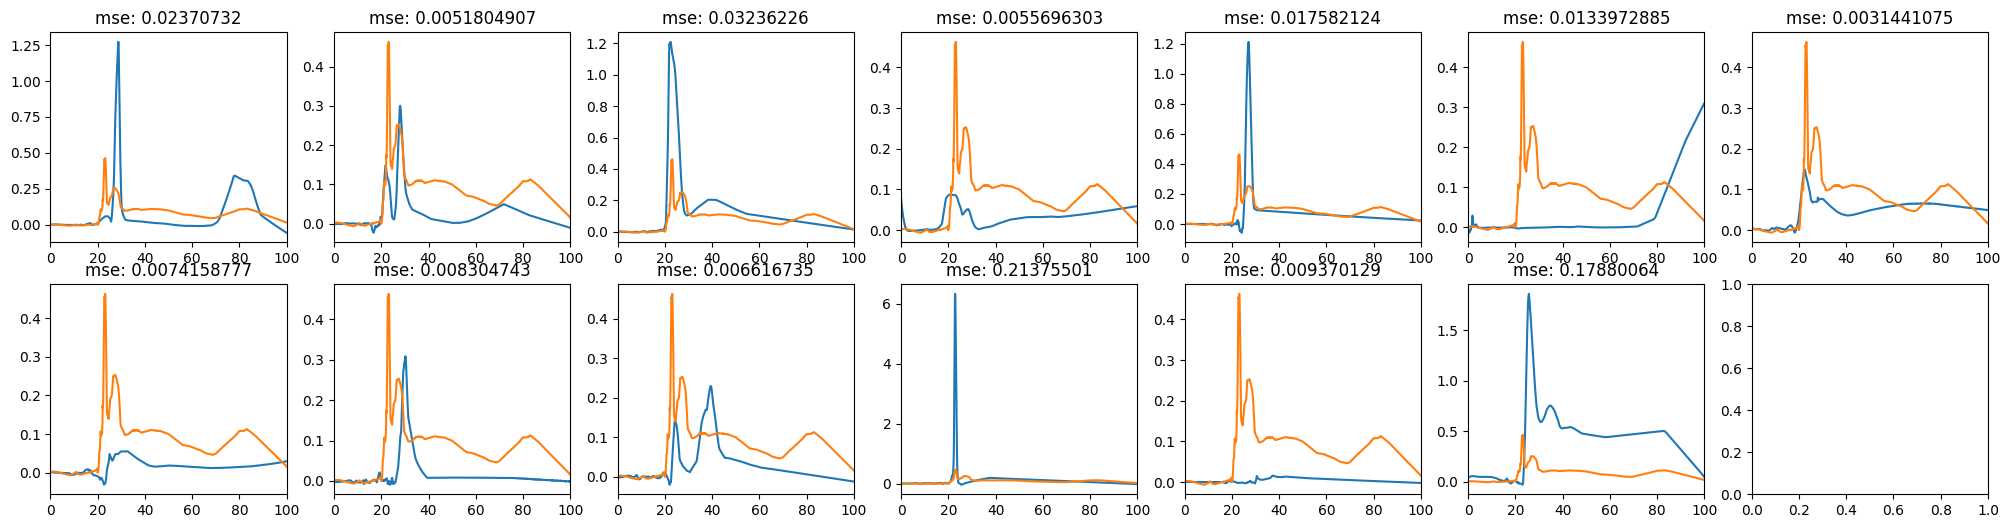

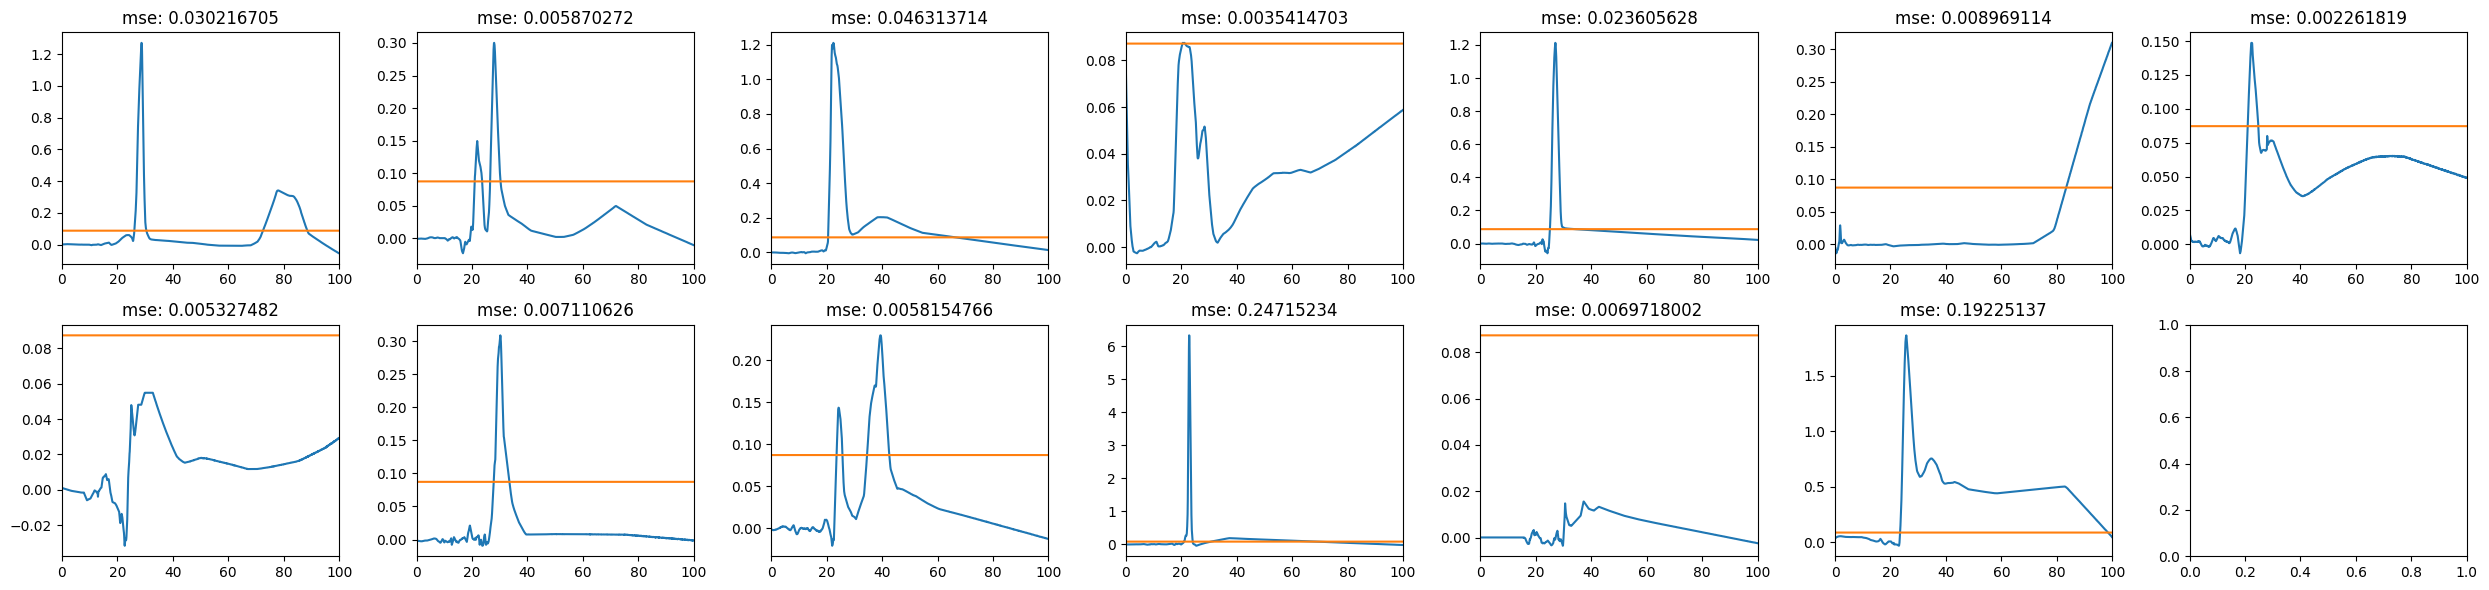

In [32]:
fig_1, axs_1 = plt.subplots(2, 7,figsize=(25, 6))

fig_2, axs_2 = plt.subplots(2, 7,figsize=(25, 6))

path = os.getcwd() 
csv_files = glob.glob(os.path.join(path, '../Dane/data_nowe/dane_przetworzone/12_wybranych/*.csv')) 
i=0;
k=0;
for f in csv_files: 
    dataset = pd.read_csv(f) 
    [x,y]=prep_data(dataset) 

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model_temp =build_and_compile_model_input(3)
    model_temp.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
    model_temp.save("../Modele/11_12_testowanie/model_calosc_z_dodatku_"+str((i+1)*(k+1)))
    output_1=model_temp.predict(input_3)

    axs_1[k,i].plot(input_3_plot, output_1.reshape(1440))
    output_2=model_calosc_danych_bez_dodatku.predict(input_3)
    axs_1[k,i].plot(input_3_plot, output_2.reshape(1440))
    axs_1[k,i].set_xlim(0, 100)
    mse=mean_squared_error(output_1,output_2)
    axs_1[k,i].set_title("mse: "+ str(mse))

    result = dataset.loc[(dataset['Dzien_tygodnia'] == 2) & (dataset['Pora_roku'] == 2),"Tyg_zuzycie"]
    input_4=np.vstack((2*np.ones_like(input_3_plot, dtype=int), 2*np.ones_like(input_3_plot, dtype=int), input_3_plot, result.mean()*np.ones_like(input_3_plot, dtype=int))).T
    axs_2[k,i].plot(input_3_plot, output_1.reshape(1440))
    output_2=model_calosc_danych_z_dodatku.predict(input_4)
    axs_2[k,i].plot(input_3_plot, output_2.reshape(1440))
    axs_2[k,i].set_xlim(0, 100)
    mse=mean_squared_error(output_1,output_2)
    axs_2[k,i].set_title("mse: "+str(mse))

    i+=1
    if i==7:
        k=1
        i=0

plt.tight_layout()

plt.show()
